Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
data = pd.read_csv('ds_dataset.csv', )
data.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


Data Pre-Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
First Name                                                   10000 non-null object
Last Name                                                    10000 non-null object
City                                                         10000 non-null object
State                                                        10000 non-null object
Zip Code                                                     10000 non-null int64
DOB [DD/MM/YYYY]                                             10000 non-null object
Age                                                          10000 non-null int64
Gender                                                       10000 non-null object
Email Address                                                10000 non-null object
Contact Number                                               10000 non-null int64
Emergency Contact Number                                     1000

In [4]:
data.describe()

,Zip Code,Age,Contact Number,Emergency Contact Number,CGPA/ percentage,Expected Graduation-year,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,0.0,10000.000000,10000.000000,0.0,0.0
mean,410087.514700,21.384700,5.521004e+09,5.569675e+09,8.500260,2021.509300,NaN,7.988400,7.995500,NaN,NaN
std,6408.897346,1.489674,2.622215e+09,2.581596e+09,0.860161,1.116888,NaN,1.413529,1.419113,NaN,NaN
min,400012.000000,19.000000,6.402026e+06,1.001359e+09,7.000000,2020.000000,NaN,6.000000,6.000000,NaN,NaN
25%,400701.000000,20.000000,3.191651e+09,3.353914e+09,7.750000,2021.000000,NaN,7.000000,7.000000,NaN,NaN
50%,413001.000000,21.000000,5.543699e+09,5.634072e+09,8.500000,2022.000000,NaN,8.000000,8.000000,NaN,NaN
75%,416004.000000,23.000000,7.796677e+09,7.794617e+09,9.232500,2023.000000,NaN,9.000000,9.000000,NaN,NaN
max,416436.000000,24.000000,9.999767e+09,9.999852e+09,10.000000,2023.000000,NaN,10.000000,10.000000,NaN,NaN


In [5]:
data.drop(['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)', 'link to Linkedin profile','State','DOB [DD/MM/YYYY]', 'Email Address','Contact Number', 'Emergency Contact Number','Zip Code','How Did You Hear About This Internship?','Current Employment Status','Course Type','Degree','Course Type'], axis=1, inplace=True)

In [6]:
data.drop(['First Name','Last Name'],axis=1,inplace=True)
data.isnull().sum()

City                                                      0
Age                                                       0
Gender                                                    0
College name                                              0
University Name                                           0
Major/Area of Study                                       0
Which-year are you studying in?                           0
CGPA/ percentage                                          0
Expected Graduation-year                                  0
Areas of interest                                         0
Have you worked core Java                                 0
Programming Language Known other than Java (one major)    0
Have you worked on MySQL or Oracle database               0
Have you studied OOP Concepts                             0
Rate your written communication skills [1-10]             0
Rate your verbal communication skills [1-10]              0
label                                   

Seperating continuous variables and categorical variables

In [7]:
data_con = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(exclude=np.number)

In [8]:
data_con.head()

,Age,CGPA/ percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10]
0,19,7.26,2022,6,10
1,22,8.73,2020,10,7
2,24,8.61,2020,8,6
3,20,7.96,2022,9,6
4,23,7.07,2023,8,6


In [9]:
data_cat.head(10)

,City,Gender,College name,University Name,Major/Area of Study,Which-year are you studying in?,Areas of interest,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,label
0,Kolhapur,Male,DY Patil College of Engineering And Technology,Shivaji University,Electrical Engineering,Second-year,Artificial Intelligence,Yes,HTML/CSS,Yes,No,ineligible
1,Pune,Female,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,Electronics and Telecommunication,Fourth-year,Cloud Computing,Yes,PHP,No,Yes,eligible
2,Mumbai,Male,Vidyalankar Institute of Technology,Mumbai University,Electrical Engineering,Fourth-year,IoT,Yes,C,No,No,ineligible
3,Solapur,Female,Brahmdevdada Mane Institute of Technology,Punyashlok Ahilyadevi Holkar Solapur University,Computer Engineering,Second-year,Digital Marketing,No,PHP,No,Yes,ineligible
4,Sangli,Female,Rajarambapu Institute of Technology,Shivaji University,Electrical Engineering,First-year,Cloud Computing,No,Python,No,Yes,ineligible
5,Sangli,Male,Rajarambapu Institute of Technology,Shivaji University,Electrical Engineering,Fourth-year,Python,Yes,PHP,Yes,No,ineligible
6,Solapur,Female,Skn Sinhgad College of Engineering,Punyashlok Ahilyadevi Holkar Solapur University,Electronics and Telecommunication,Third-year,QMS/Testing,Yes,PHP,Yes,No,eligible
7,Kolhapur,Female,Bharati Vidyapeeth College of Engineering,Shivaji University,Electronics and Telecommunication,Third-year,Data Science,No,C++,No,Yes,eligible
8,Mumbai,Male,St. Francis Institute of Technology,Mumbai University,Computer Engineering,Fourth-year,QMS/Testing,No,C++,Yes,Yes,eligible
9,Kolhapur,Male,DY Patil College of Engineering And Technology,Shivaji University,Electronics and Telecommunication,Fourth-year,IoT,Yes,.Net,No,Yes,ineligible


In [10]:
skewness = pd.DataFrame(data={'name':list(data_con),'skew':skew(data_con)}) #Checking Skewness
skewness

,name,skew
0,Age,0.037070
1,CGPA/ percentage,-0.000044
2,Expected Graduation-year,-0.016206
3,Rate your written communication skills [1-10],0.016689
4,Rate your verbal communication skills [1-10],0.000170


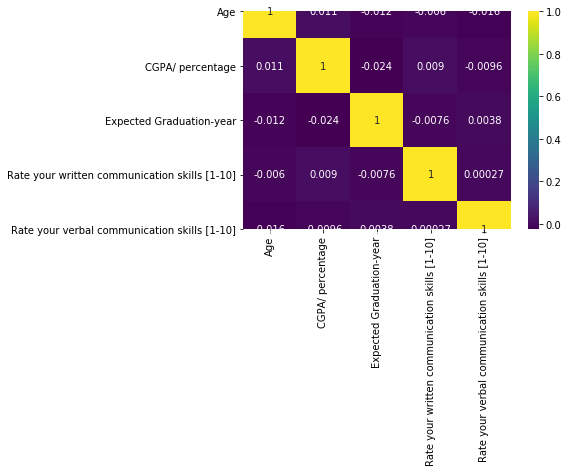

In [11]:
sns.heatmap(data_con.corr(),cmap='viridis',annot=True) #Checking Co-Linearity

Encoding Categorical Features

In [12]:
le = LabelEncoder()
for col in data_cat:
    data_cat[col] = le.fit_transform(data_cat[col])
     
data_cat.head()

,City,Gender,College name,University Name,Major/Area of Study,Which-year are you studying in?,Areas of interest,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,label
0,0,1,5,3,1,2,0,1,4,1,0,1
1,3,0,22,2,2,1,3,1,6,0,1,0
2,1,1,21,0,1,1,9,1,1,0,0,1
3,5,0,3,1,0,2,7,0,6,0,1,1
4,4,0,12,3,1,0,3,0,7,0,1,1


In [13]:
data1 = pd.concat([data_con, data_cat],axis=1,ignore_index=True)
data1.columns = ['Age','CGPA/percentage','Expected Graduation-year','Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]','City','Gender','College name','University Name','Major/Area of Study','Which-year are you studying in?','Areas of interest','Have you worked core Java','Programming Language Known other than Java (one major)','Have you worked on MySQL or Oracle database','Have you studied OOP Concepts','label']

In [14]:
data1.head()

,Age,CGPA/percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],City,Gender,College name,University Name,Major/Area of Study,Which-year are you studying in?,Areas of interest,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,label
0,19,7.26,2022,6,10,0,1,5,3,1,2,0,1,4,1,0,1
1,22,8.73,2020,10,7,3,0,22,2,2,1,3,1,6,0,1,0
2,24,8.61,2020,8,6,1,1,21,0,1,1,9,1,1,0,0,1
3,20,7.96,2022,9,6,5,0,3,1,0,2,7,0,6,0,1,1
4,23,7.07,2023,8,6,4,0,12,3,1,0,3,0,7,0,1,1


In [15]:
X = data1.iloc[:,:-1] #Splliting the target variable
y = data1.iloc[:,-1]

In [16]:
ss = StandardScaler() #Scaling Numerical Features
X = ss.fit_transform(X)

In [17]:
Cols = list(data1)

In [18]:
X = pd.DataFrame(X,columns=Cols[:-1])
X.head()

,Age,CGPA/percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],City,Gender,College name,University Name,Major/Area of Study,Which-year are you studying in?,Areas of interest,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts
0,-1.600900,-1.441964,0.439368,-1.406762,1.412573,-1.471369,1.003607,-0.822271,1.197454,0.497383,0.451232,-1.642537,1.006219,0.231551,0.998601,-1.008839
1,0.413064,0.267103,-1.351412,1.423176,-0.701530,0.282000,-0.996406,1.676809,0.401539,1.748660,-0.445137,-0.989579,1.006219,1.105164,-1.001401,0.991238
2,1.755707,0.127587,-1.351412,0.008207,-1.406231,-0.886912,1.003607,1.529804,-1.190291,0.497383,-0.445137,0.316336,1.006219,-1.078868,-1.001401,-1.008839
3,-0.929579,-0.628123,0.439368,0.715691,-1.406231,1.450913,-0.996406,-1.116280,-0.394376,-0.753895,0.451232,-0.118969,-0.993819,1.105164,-1.001401,0.991238
4,1.084386,-1.662864,1.334758,0.008207,-1.406231,0.866456,-0.996406,0.206762,1.197454,0.497383,-1.341507,-0.989579,-0.993819,1.541970,-1.001401,0.991238


In [19]:
# Separate data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [20]:
# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(random_state=42, criterion='entropy', max_depth= 15, max_features= 'auto', n_estimators= 19)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
Accuracy = accuracy_score(y_test,y_pred_rf)
F1_Score = f1_score(y_test,y_pred_rf)
print("Accuracy : ",Accuracy*100)
print('F1-score : ',F1_Score*100)
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,y_pred_rf)))

Accuracy :  100.0
F1-score :  100.0
Confusion Matrix is

[[1207    0]
 [   0 1793]]


Maximum Accuracy reached using Random Forest CLassifier  Model


Accuracy is 1.0


F1-score is 1.0


Confusion Matrix is:

[[1207  0]


 [  0 1793]]